In [4]:
# @title Necessary imports and globals.
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
from collections import defaultdict
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

BASE_PATH = './logs'  # @param
GAMES = ['asterix']  # @param
AGENTS=['c51', 'c21', 'c11', 'c5', 'dqn', 'rainbow', 'rainbow_no_n_steps', 'rainbow_no_priority']
human_baselines = {'asterix': 8503.3}

## Load the logs

In [6]:
dfs = []
for agent in AGENTS:
    for game in GAMES:
        tot_episodes = 0
        for i, data in enumerate(colab_utils.load_statistics(BASE_PATH+'/{}_{}/logs/'.format(game, agent))[0].values()):
            tot_episodes += (sum(data['train_episode_lengths']) + sum(data['eval_episode_lengths'])) 
            dfs.append(pd.DataFrame([{'iteration':i, 'game':game, 'agent': agent, 'return': r, 'steps': tot_episodes} for r in data['eval_episode_returns']]))
sample_data = pd.concat(dfs, ignore_index=True).reset_index()

Reading statistics from: ./logs/asterix_c51/logs//log_60
Reading statistics from: ./logs/asterix_c21/logs//log_59
Reading statistics from: ./logs/asterix_c11/logs//log_60
Reading statistics from: ./logs/asterix_c5/logs//log_60
Reading statistics from: ./logs/asterix_dqn/logs//log_61
Reading statistics from: ./logs/asterix_rainbow/logs//log_56
Reading statistics from: ./logs/asterix_rainbow_no_n_steps/logs//log_57
Reading statistics from: ./logs/asterix_rainbow_no_priority/logs//log_59


In [7]:
experimental_data = defaultdict(lambda: None)
for game in GAMES:
    if experimental_data[game] == None:
        experimental_data[game] = sample_data[sample_data.game == game]
    else:
        experimental_data[game] = experimental_data[game].merge(sample_data[sample_data.game == game], how='outer')

# Number of Atoms

In [14]:
plt.rc('font', size=18)

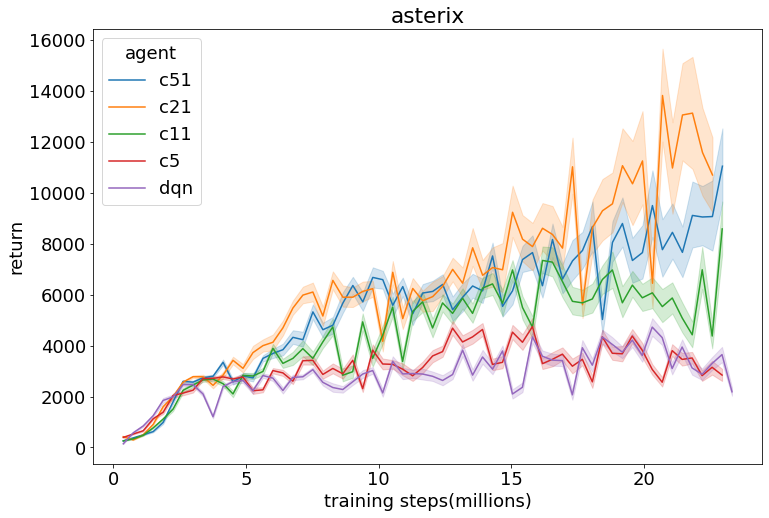

In [15]:
agents = ['c51', 'c21', 'c11', 'c5', 'dqn']
for game in GAMES:
    data_to_plot = experimental_data[game]
    data_to_plot = data_to_plot[data_to_plot['agent'].apply(lambda x: x in agents)]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.lineplot(x='steps', y='return', hue='agent', data=data_to_plot, ax=ax)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x/1e6)))
    plt.title(game)
    plt.xlabel('training steps(millions)')
    plt.show()

# Ablation

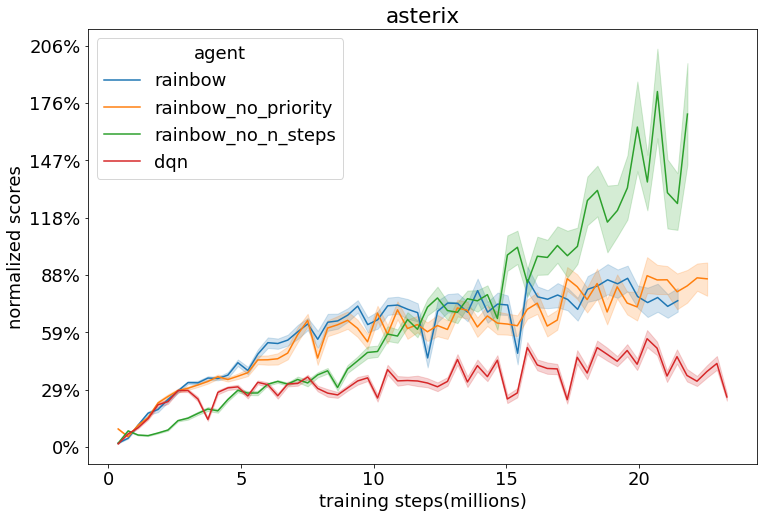

In [16]:
agents = ['rainbow', 'rainbow_no_priority', 'rainbow_no_n_steps', 'dqn']
for game in GAMES:
    baseline = human_baselines[game]
    data_to_plot = experimental_data[game]
    data_to_plot = data_to_plot[data_to_plot['agent'].apply(lambda x: x in agents)]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.lineplot(x='steps', y='return', hue='agent', data=data_to_plot, ax=ax, hue_order=agents)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0%}'.format(x/baseline)))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x/1e6)))
    plt.title(game)
    plt.xlabel('training steps(millions)')
    plt.ylabel('normalized scores')
    plt.show()